In [1]:
import random
import torch
import numpy as np
from torchvision import models
from torch.hub import load_state_dict_from_url
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

In [3]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
# # All data path
# data_dir1 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/1080Lines')
# data_dir2 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/1400Ripples')
# data_dir3 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Air_Compressor')
# data_dir4 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Blip')
# data_dir5 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Chirp')
# data_dir6 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Extremely_Loud')
# data_dir7 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Helix')
# data_dir8 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Koi_Fish')
# data_dir9 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Light_Modulation')
# data_dir10 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Low_Frequency_Burst')
# data_dir11 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Low_Frequency_Lines')
# data_dir12 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/No_Glitch')
# data_dir13 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/None_of_the_Above')
# data_dir14 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Paired_Doves')
# data_dir15 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Power_line')
# data_dir16 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Repeating_Blips')
# data_dir17 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Scattered_Light')
# data_dir18 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Scratchy')
# data_dir19 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Tomte')
# data_dir20 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Violin_Mode')
# data_dir21 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Wandering_Line')
# data_dir22 = Path('/Users/CAL/Desktop/Lab/H1L1_G_Label/Whistle')
# paths = [data_dir1, data_dir2, data_dir3, data_dir4, data_dir5, data_dir6, data_dir7, data_dir8, data_dir9, data_dir10,
#         data_dir11, data_dir12, data_dir13, data_dir14, data_dir15, data_dir16, data_dir17, data_dir18, data_dir19,
#          data_dir20, data_dir21, data_dir22]

# # data_dir = Path(data_dir)

In [5]:
# Some data path
data_dir1 = Path('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Chirp/1s_c')
data_dir2 = Path('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Power_Line/4s_c')
paths = [data_dir1, data_dir2]

In [6]:
sample_images = list(data_dir2.glob('./*'))

In [7]:
sample_images

[WindowsPath('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Power_Line/4s_c/1.png'),
 WindowsPath('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Power_Line/4s_c/10.png'),
 WindowsPath('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Power_Line/4s_c/11.png'),
 WindowsPath('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Power_Line/4s_c/12.png'),
 WindowsPath('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Power_Line/4s_c/13.png'),
 WindowsPath('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Power_Line/4s_c/14.png'),
 WindowsPath('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Power_Line/4s_c/15.png'),
 WindowsPath('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Power_Line/4s_c/16.png'),
 WindowsPath('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Power_Line/4s_c/17.png'),
 WindowsPath('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Power_Line/4s_c/18.png'),
 WindowsPath('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Power_Line/4s_c/19.png'),
 WindowsPath('/Users/CAL/Desktop/Lab/H1L1_G_time_labeled/Power_Line/4s_c/2.png'),
 Windo

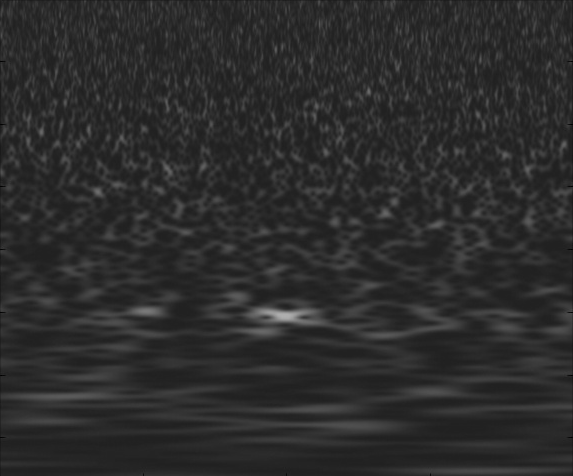

In [8]:
PIL.Image.open(str(sample_images[1]))

In [9]:
from PIL import Image
 
image1 = Image.open(str(sample_images[1]))

imag1_size = image1.size

print(imag1_size)

(573, 476)


In [10]:
from numpy import asarray
image = Image.open(str(sample_images[13]))
data = asarray(image)
print(type(data))
print(data.shape)
print(data)

<class 'numpy.ndarray'>
(476, 574, 4)
[[[  0   0   0 255]
  [ 33  33  33 255]
  [ 41  41  41 255]
  ...
  [ 37  37  37 255]
  [ 42  42  42 255]
  [ 40  40  40 255]]

 [[  1   1   1 255]
  [ 33  33  33 255]
  [ 45  45  45 255]
  ...
  [ 36  36  36 255]
  [ 42  42  42 255]
  [ 39  39  39 255]]

 [[  0   0   0 255]
  [ 32  32  32 255]
  [ 39  39  39 255]
  ...
  [ 37  37  37 255]
  [ 43  43  43 255]
  [ 39  39  39 255]]

 ...

 [[  1   1   1 255]
  [ 48  48  48 255]
  [ 63  63  63 255]
  ...
  [ 38  38  38 255]
  [ 38  38  38 255]
  [ 30  30  30 255]]

 [[  1   1   1 255]
  [ 54  54  54 255]
  [ 65  65  65 255]
  ...
  [ 39  39  39 255]
  [ 39  39  39 255]
  [ 32  32  32 255]]

 [[  0   0   0 255]
  [ 59  59  59 255]
  [ 76  76  76 255]
  ...
  [ 43  43  43 255]
  [ 46  46  46 255]
  [ 33  33  33 255]]]


In [11]:
len(sample_images)

20

In [12]:
# import tensorflow as tf
# from keras.datasets import mnist
# fashion_mnist = tf.keras.datasets.fashion_mnist
# # X_train, y_train = fashion_mnist.load_()
# (X_train0, y_train), (test_images, test_labels) = fashion_mnist.load_data()

In [13]:
All_images = list()
y_train = np.zeros(20000)
count_y = 0

 
num_cat = 2             # 원래 총 개수는 range 22
for i in range(num_cat): 
    image_group = list(paths[i].glob('./*'))
    count_group_num = 0
    for j in range(len(image_group)):
        image = Image.open(str(image_group[j]))
        All_images.append(asarray(image))
        y_train[count_y] = i
        count_y += 1
        count_group_num += 1
        if count_group_num >= 1000:
            break

In [14]:
image_group = list(paths[0].glob('./*'))
len(image_group)

20

In [15]:
len(All_images)

40

In [16]:
type(y_train)

numpy.ndarray

In [17]:
np.ravel(All_images[3], order='C').shape

(1082616,)

In [18]:
# X_train = np.zeros((20000,480000))

In [19]:
X_train = np.zeros((len(All_images),480000))
for i in range(len(All_images)):
    x = np.ravel(All_images[i], order='C')
    for j in range(len(All_images)):
        X_train[i][j] = x[j]

In [20]:
X_train.shape

(40, 480000)

In [21]:
y_train.shape

(20000,)

In [22]:
np.unique(y_train)

array([0., 1.])

In [23]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [24]:
 # Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [25]:
 # Subset first 20k data points to visualize
x_subset = X_train[0:len(All_images)]
# x_subset = X_train[0:5000]
y_subset = y_train[0:len(All_images)]
# y_subset = y_train[0:5000]

print(np.unique(y_subset))

[0. 1.]


In [26]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.765239953994751 seconds


In [27]:
#  # Utility function to visualize the outputs of PCA and t-SNE

# def fashion_scatter(x, colors):
#     # choose a color palette with seaborn.
#     num_classes = len(np.unique(colors))
#     palette = np.array(sns.color_palette("hls", num_classes))

#     # create a scatter plot.
#     f = plt.figure(figsize=(8, 8))
#     ax = plt.subplot(aspect='equal')
#     sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
#     plt.xlim(-25, 25)
#     plt.ylim(-25, 25)
#     ax.axis('off')
#     ax.axis('tight')

#     # add the labels for each digit corresponding to the label
#     txts = []

#     for i in range(num_classes):

#         # Position of each label at median of data points.

#         xtext, ytext = np.median(x[colors == i, :], axis=0)
#         txt = ax.text(xtext, ytext, str(i), fontsize=24)
#         txt.set_path_effects([
#             PathEffects.Stroke(linewidth=5, foreground="w"),
#             PathEffects.Normal()])
#         txts.append(txt)

#     return f, ax, sc, txts

In [28]:
#  # Subset first 20k data points to visualize
# x_subset = X_train[0:20000]
# y_subset = y_train[0:20000]

# print(np.unique(y_subset))

In [29]:
# from sklearn.datasets import load_digits
# from MulticoreTSNE import MulticoreTSNE as TSNE
# from matplotlib import pyplot as plt

# digits = load_digits()
# embeddings = TSNE(n_jobs=4).fit_transform(digits.data)
# vis_x = embeddings[:, 0]
# vis_y = embeddings[:, 1]
# plt.scatter(vis_x, vis_y, c=digits.target, cmap=plt.cm.get_cmap("jet", 10), marker='.')
# plt.colorbar(ticks=range(10))
# plt.clim(-0.5, 9.5)
# plt.show()

In [30]:
# ## Parameter를 조정(perplexity)
# # import torch
# # from GPUtil import showUtilization as gpu_usage
# # print('initial GPU Usage')
# # gpu\_usage()
# # torch.cuda.empty\_cache()
#-------------------------------------------------------
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2)
# fashion_tsne = tsne.fit_transform(x_subset)

# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [31]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.7109270095825195 seconds


In [32]:
 pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.96254527 0.02918657 0.00282826 0.00197175]


C:\Users\CAL\AppData\Local\Temp\ipykernel_25392\1966935013.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(-51.452157566680924, -8.09362459072376, '0'),
  Text(-66.60109035323771, 1.8286351803304597, '1')])

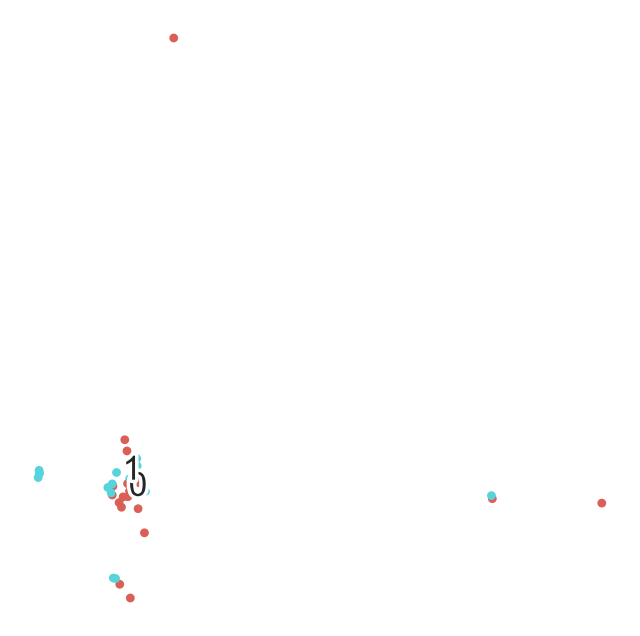

In [33]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

In [100]:
## Parameter를 조정(perplexity)

from sklearn.manifold import TSNE

# fashion_tsne = TSNE(n_components=2, perplexity=30, learning_rate=700).fit_transform(x_subset)
fashion_tsne = TSNE(perplexity=17).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 50613.44170117378 seconds


C:\Users\CAL\AppData\Local\Temp\ipykernel_25392\1966935013.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


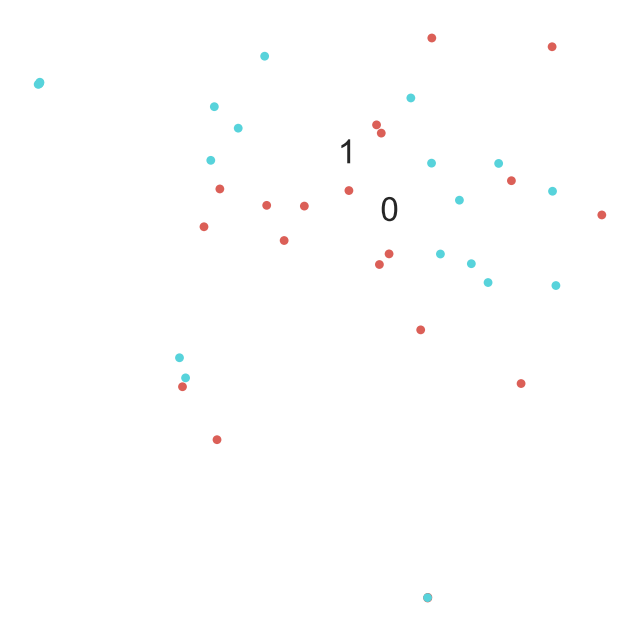

In [101]:
fashion_scatter(fashion_tsne, y_subset)
plt.savefig('t_sne fig.png')

In [36]:
 time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

ValueError: n_components=50 must be between 0 and min(n_samples, n_features)=40 with svd_solver='full'

In [ ]:
## Parameter를 조정(perplexity)
 
import time
time_start = time.time()


fashion_pca_tsne = TSNE(learning_rate=200, random_state=RS).fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
fashion_scatter(fashion_pca_tsne, y_subset)
plt.savefig('pca_t-sne fig.png')